In [1]:
# Import required packages
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import glob

# Import snowdroughtindex package
from snowdroughtindex.core import data_preparation

In [2]:
# load files paths
data_path = r'C:\Users\walimunige.rupasingh\OneDrive - University of Calgary\Documents\GitHub\snowdroughtindex-main\data\input_data\CaSR_data\\'
output_path = r'C:\Users\walimunige.rupasingh\OneDrive - University of Calgary\Documents\GitHub\snowdroughtindex-main\data\output_data\casr_data\\'
shapefile_path = r'C:\Users\walimunige.rupasingh\OneDrive - University of Calgary\Documents\GitHub\snowdroughtindex-main\data\input_data\Elevation\Bow_elevation_combined.shp'

# 1. open all swe data files and combine them into a single xarray dataset spatially and temporally

In [3]:
swe = xr.open_dataset(data_path + 'CaSR_v3.1_P_SWE_LAND_rlon211-245_rlat421-455_2000-2003.nc')
dataframe = swe.to_dataframe().reset_index()
display(dataframe)


,time,rlat,rlon,lon,lat,rotated_pole,CaSR_v3.1_P_SWE_LAND
0,1999-12-31 13:00:00,-6.30,-16.497223,242.215729,48.815422,1,NaN
1,1999-12-31 13:00:00,-6.30,-16.407211,242.342209,48.848152,1,NaN
2,1999-12-31 13:00:00,-6.30,-16.317215,242.468872,48.880726,1,NaN
3,1999-12-31 13:00:00,-6.30,-16.227219,242.595703,48.913143,1,NaN
4,1999-12-31 13:00:00,-6.30,-16.137222,242.722687,48.945408,1,NaN
...,...,...,...,...,...,...,...
42953395,2003-12-31 12:00:00,-3.24,-13.797226,244.502960,52.624481,1,3.125
42953396,2003-12-31 12:00:00,-3.24,-13.707214,244.642578,52.654419,1,7.125
42953397,2003-12-31 12:00:00,-3.24,-13.617218,244.782394,52.684174,1,6.375
42953398,2003-12-31 12:00:00,-3.24,-13.527222,244.922394,52.713757,1,7.750


In [4]:
# Step 1: List all SWE files using the correct data_path variable
file_list = sorted(glob.glob(f"{data_path}CaSR_v3.1_P_SWE_LAND_*.nc"))

if not file_list:
    raise FileNotFoundError(f"No files found with pattern {data_path}CaSR_v3.1_P_SWE_LAND_*.nc")

# Step 2: Open and combine them using xarray
ds_combined_swe = xr.open_mfdataset(
    file_list,
    combine='by_coords',  # will automatically align by time and coordinates
    parallel=True,        # if using Dask or want faster loading
    engine='netcdf4'      # or 'h5netcdf' if you're using that backend
)

# Optional: Check dataset structure
print(ds_combined_swe)




<xarray.Dataset> Size: 15GB
Dimensions:               (rlon: 70, rlat: 70, time: 385704)
Coordinates:
  * time                  (time) datetime64[ns] 3MB 1979-12-31T13:00:00 ... 2...
    lon                   (rlat, rlon) float32 20kB dask.array<chunksize=(35, 35), meta=np.ndarray>
    lat                   (rlat, rlon) float32 20kB dask.array<chunksize=(35, 35), meta=np.ndarray>
  * rlon                  (rlon) float64 560B -16.5 -16.41 ... -10.38 -10.29
  * rlat                  (rlat) float64 560B -9.45 -9.36 -9.27 ... -3.33 -3.24
Data variables:
    rotated_pole          (rlon, rlat, time) int32 8GB 1 1 1 1 1 1 ... 1 1 1 1 1
    CaSR_v3.1_P_SWE_LAND  (time, rlat, rlon) float32 8GB dask.array<chunksize=(1, 35, 35), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    source:       https://hpfx.collab.science.gc.ca/~scar700/rcas-casr/
    institution:  Environment and Climate Change Canada / Environnement et Ch...
    title:        Canadian Surface Reanalysis (CaSR) / Réanalyse 

In [6]:
# Select a small subset (e.g., first time step) to avoid MemoryError
subset = ds_combined_swe.isel(time=0)
swe_df = subset.to_dataframe().reset_index()
display(swe_df)


,rlon,rlat,rotated_pole,CaSR_v3.1_P_SWE_LAND,time,lon,lat
0,-16.497223,-9.450001,1,NaN,1979-12-31 13:00:00,243.874023,45.872429
1,-16.497223,-9.360001,1,NaN,1979-12-31 13:00:00,243.829147,45.956844
2,-16.497223,-9.270000,1,NaN,1979-12-31 13:00:00,243.784119,46.041233
3,-16.497223,-9.180000,1,NaN,1979-12-31 13:00:00,243.738953,46.125595
4,-16.497223,-9.090000,1,NaN,1979-12-31 13:00:00,243.693634,46.209949
...,...,...,...,...,...,...,...
4895,-10.287216,-3.600000,1,NaN,1979-12-31 13:00:00,250.240326,53.312656
4896,-10.287216,-3.510000,1,NaN,1979-12-31 13:00:00,250.201965,53.399693
4897,-10.287216,-3.420000,1,NaN,1979-12-31 13:00:00,250.163452,53.486725
4898,-10.287216,-3.330000,1,NaN,1979-12-31 13:00:00,250.124771,53.573734


In [9]:
# Rename columns for clarity (if needed, but 'date' already exists in swe_df)
# swe_df = swe_df.rename(columns={'time': 'date'})  

# drop time from the date and keep only the date
swe_df['date'] = swe_df['date'].dt.date
# Convert to datetime format
swe_df['date'] = pd.to_datetime(swe_df['date'])
# Display the first few rows of the DataFrame
display(swe_df.head())

,CaSR_v3.1_P_SWE_LAND,date,lon,lat
0,NaN,1979-12-31,243.874023,45.872429
1,NaN,1979-12-31,243.829147,45.956844
2,NaN,1979-12-31,243.784119,46.041233
3,NaN,1979-12-31,243.738953,46.125595
4,NaN,1979-12-31,243.693634,46.209949


In [16]:
# Extract SWE values and coordinates inside a GeoDataFrame
gdf_swe = gpd.GeoDataFrame(
    swe_df,
    geometry=gpd.points_from_xy(swe_df['lon'], swe_df['lat']),
    crs='EPSG:4326'  # Assuming the coordinates are in WGS84
)
# convert lon from 0-360 to -180 to 180 format
gdf_swe['lon'] = ((gdf_swe['lon'] + 180) % 360) - 180
# Update geometry to reflect new longitude values
gdf_swe['geometry'] = gpd.points_from_xy(gdf_swe['lon'], gdf_swe['lat'])

# Display the GeoDataFrame
display(gdf_swe.head())

,CaSR_v3.1_P_SWE_LAND,date,lon,lat,geometry
0,NaN,1979-12-31,-116.125977,45.872429,POINT (-116.12598 45.87243)
1,NaN,1979-12-31,-116.170837,45.956844,POINT (-116.17084 45.95684)
2,NaN,1979-12-31,-116.215881,46.041233,POINT (-116.21588 46.04123)
3,NaN,1979-12-31,-116.261047,46.125595,POINT (-116.26105 46.12560)
4,NaN,1979-12-31,-116.306366,46.209949,POINT (-116.30637 46.20995)


In [11]:

# Read the shapefile using geopandas
bow_elevation = gpd.read_file(shapefile_path)
# Set CRS if not already set (assume WGS84)
if bow_elevation.crs is None:
	bow_elevation.set_crs(epsg=4326, inplace=True)
# Ensure the CRS of the GeoDataFrame matches the gdf_swe
bow_elevation = bow_elevation.to_crs(gdf_swe.crs)
# Display the first few rows of the GeoDataFrame
display(bow_elevation.head())

,PROVCD_1,VALDATE,EDITION,DATASETNAM,VERSION,COMPLEVEL,WSCMDA,WSCSDA,WSCSSDA,FDA,...,WSCSSDANAM,min,max,mean,count,std,median,PROVCD_2,elev_class,geometry
0,AB,20070208,1,05BM000,0,NHN-CL1,05,05B,05BM,05BM,...,Lower Bow - Crowfoot,776.0,1177.0,953.688214,9897452,71.132927,944.0,NaN,500_1000m,"POLYGON ((-112.58577 51.23024, -112.58519 51.2..."
1,AB,20070130,1,05BN000,0,NHN-CL1,05,05B,05BN,05BN,...,Lower Bow - Mouth,700.0,998.0,772.376015,9312616,32.852467,764.0,NaN,500_1000m,"POLYGON ((-112.49620 50.71881, -112.49566 50.7..."
2,AB,20070226,1,05BH000,0,NHN-CL1,05,05B,05BH,05BH,...,Central Bow - Jumpingpond,1038.0,2479.0,1259.913722,4121228,176.434021,1227.0,NaN,1000_1500m,"POLYGON ((-113.93263 51.12563, -113.93288 51.1..."
3,AB,20070228,1,05BK000,0,NHN-CL1,05,05B,05BK,05BK,...,Fish (Alta.),981.0,1777.0,1226.170423,1151005,126.086335,1194.0,NaN,1000_1500m,"POLYGON ((-114.10188 50.95504, -114.09750 50.9..."
4,AB,20070302,1,05BE000,0,NHN-CL1,05,05B,05BE,05BE,...,Upper Bow - Policeman,1146.0,3054.0,1601.837836,1655101,376.052387,1437.0,NaN,1500_2000m,"POLYGON ((-114.72215 51.33033, -114.72235 51.3..."


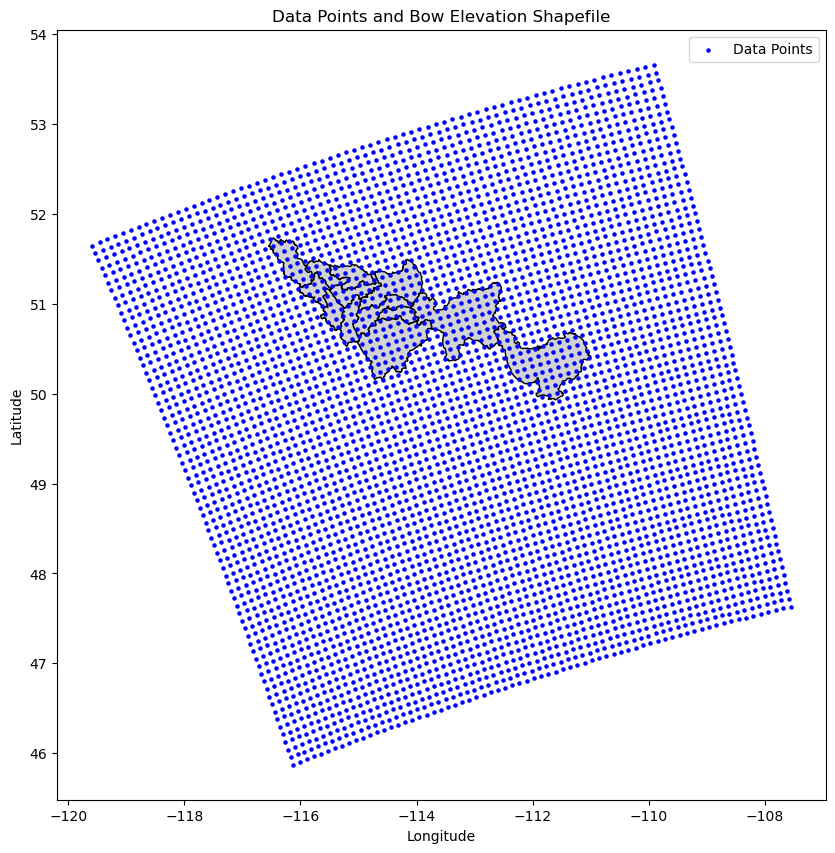

In [17]:
# plot data points and shapefile
fig, ax = plt.subplots(figsize=(10, 10))
bow_elevation.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_swe.plot(ax=ax, color='blue', markersize=5, label='Data Points')
ax.set_title('Data Points and Bow Elevation Shapefile')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

In [18]:
# Extract SWE data for the Bow River Basin
bow_swe = gdf_swe[gdf_swe.geometry.within(bow_elevation.unary_union)]
# Display the first few rows of the extracted SWE data
display(bow_swe.head())

,CaSR_v3.1_P_SWE_LAND,date,lon,lat,geometry
1460,NaN,1979-12-31,-116.422638,51.557026,POINT (-116.42264 51.55703)
1461,NaN,1979-12-31,-116.472961,51.641434,POINT (-116.47296 51.64143)
1527,NaN,1979-12-31,-116.137970,51.334591,POINT (-116.13797 51.33459)
1528,NaN,1979-12-31,-116.187500,51.419113,POINT (-116.18750 51.41911)
1529,NaN,1979-12-31,-116.237213,51.503613,POINT (-116.23721 51.50361)


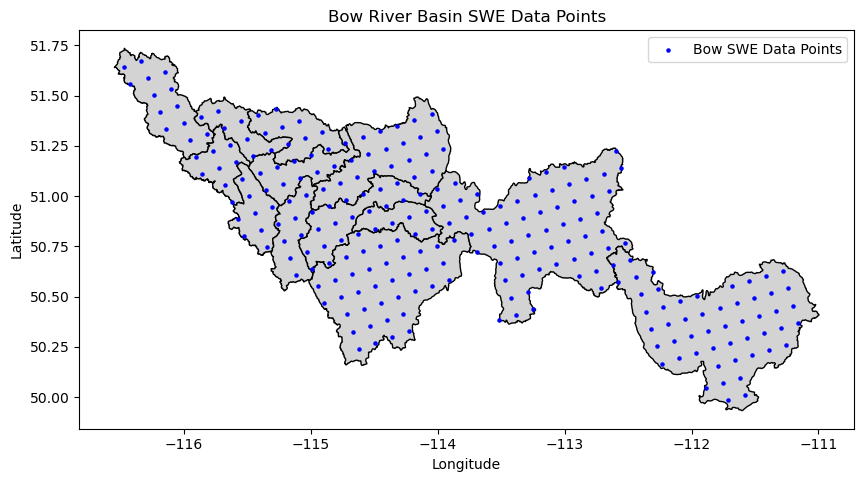

In [19]:
# plot the extracted SWE data on the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
bow_elevation.plot(ax=ax, color='lightgrey', edgecolor='black')
bow_swe.plot(ax=ax, color='blue', markersize=5, label='Bow SWE Data Points')
ax.set_title('Bow River Basin SWE Data Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

In [28]:
# read first data coordinates
first_data_point = bow_swe.iloc[0]
# Extract the coordinates of the first data point
first_point_coords = (first_data_point['lon'], first_data_point['lat'])
# Print the coordinates
print(f"First data point coordinates: {first_point_coords}")


First data point coordinates: (-116.42264, 51.557026)


In [31]:
# get all the data with same first_point_coords
bow_swe_first_point = bow_swe[
    (bow_swe['lon'] == first_point_coords[0]) & 
    (bow_swe['lat'] == first_point_coords[1])
]
# Display the first few rows of the filtered DataFrame
display(bow_swe_first_point)


,CaSR_v3.1_P_SWE_LAND,date,lon,lat,geometry
1460,NaN,1979-12-31,-116.422638,51.557026,POINT (-116.42264 51.55703)


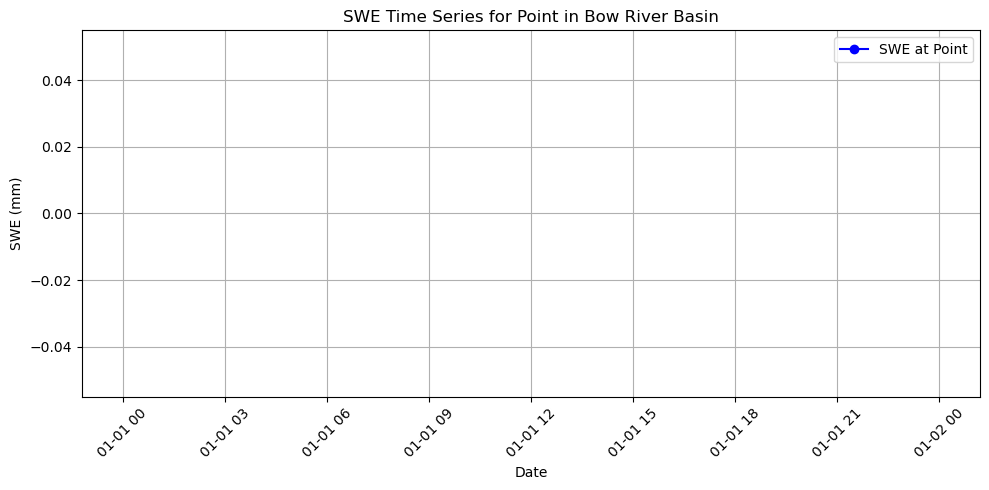

In [22]:
# plot timeseries of SWE data for one point in the Bow River Basin
point = bow_swe.iloc[0]  # Select the first point
point_swe = bow_swe[bow_swe.geometry == point.geometry]
plt.figure(figsize=(10, 5))
plt.plot(point_swe['date'], point_swe['CaSR_v3.1_P_SWE_LAND'], marker='o',
            linestyle='-', color='blue', label='SWE at Point')  
plt.title('SWE Time Series for Point in Bow River Basin')
plt.xlabel('Date')
plt.ylabel('SWE (mm)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# 2. open all precipitation data files and combine them into a single xarray dataset spatially and temporally
